# Prepare a classification model using Naive Bayes for salary data

## Data Description

- age : age of a person
- workclass	: A work class is a grouping of work 
- education	: Education of an individuals	
- maritalstatus : Marital status of an individulas	
- occupation : occupation of an individuals
- relationship : 	
- race :  Race of an Individual
- sex :  Gender of an Individual
- capitalgain :  profit received from the sale of an investment	
- capitalloss	: A decrease in the value of a capital asset
- hoursperweek : number of hours work per week	
- native : Native of an individual
- Salary : salary of an individual

## Attaching Resources

### Importing Necessary Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

### Adding Dataset

In [12]:
sd_train = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/Assignment_12_Naive%20Bayes/Dataset/SalaryData_Train.csv')

sd_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
sd_test = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/Assignment_12_Naive%20Bayes/Dataset/SalaryData_Test.csv')

sd_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Performing EDA In Train Dataset

### Applying Descriptive Statistics

In [14]:
sd_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [15]:
sd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [16]:
sd_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [17]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
                str(len(df[df.columns[i]].unique())))


In [21]:
uni(sd_train)


 All Unique Value in age
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 90]
Total no of unique values 72

 All Unique Value in workclass
[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
Total no of unique values 7

 All Unique Value in education
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
Total no of unique values 16

 All Unique Value in educationno
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Total no of unique values 16

 All Unique Value in maritalstatus
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
Total no of unique values 7

 All Uniq

### Checking for Duplicated Values

In [20]:
sd_train[sd_train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


- There is no duplicate vale in are dataset

### Visualizing The Data

#### Ploting Boxplot

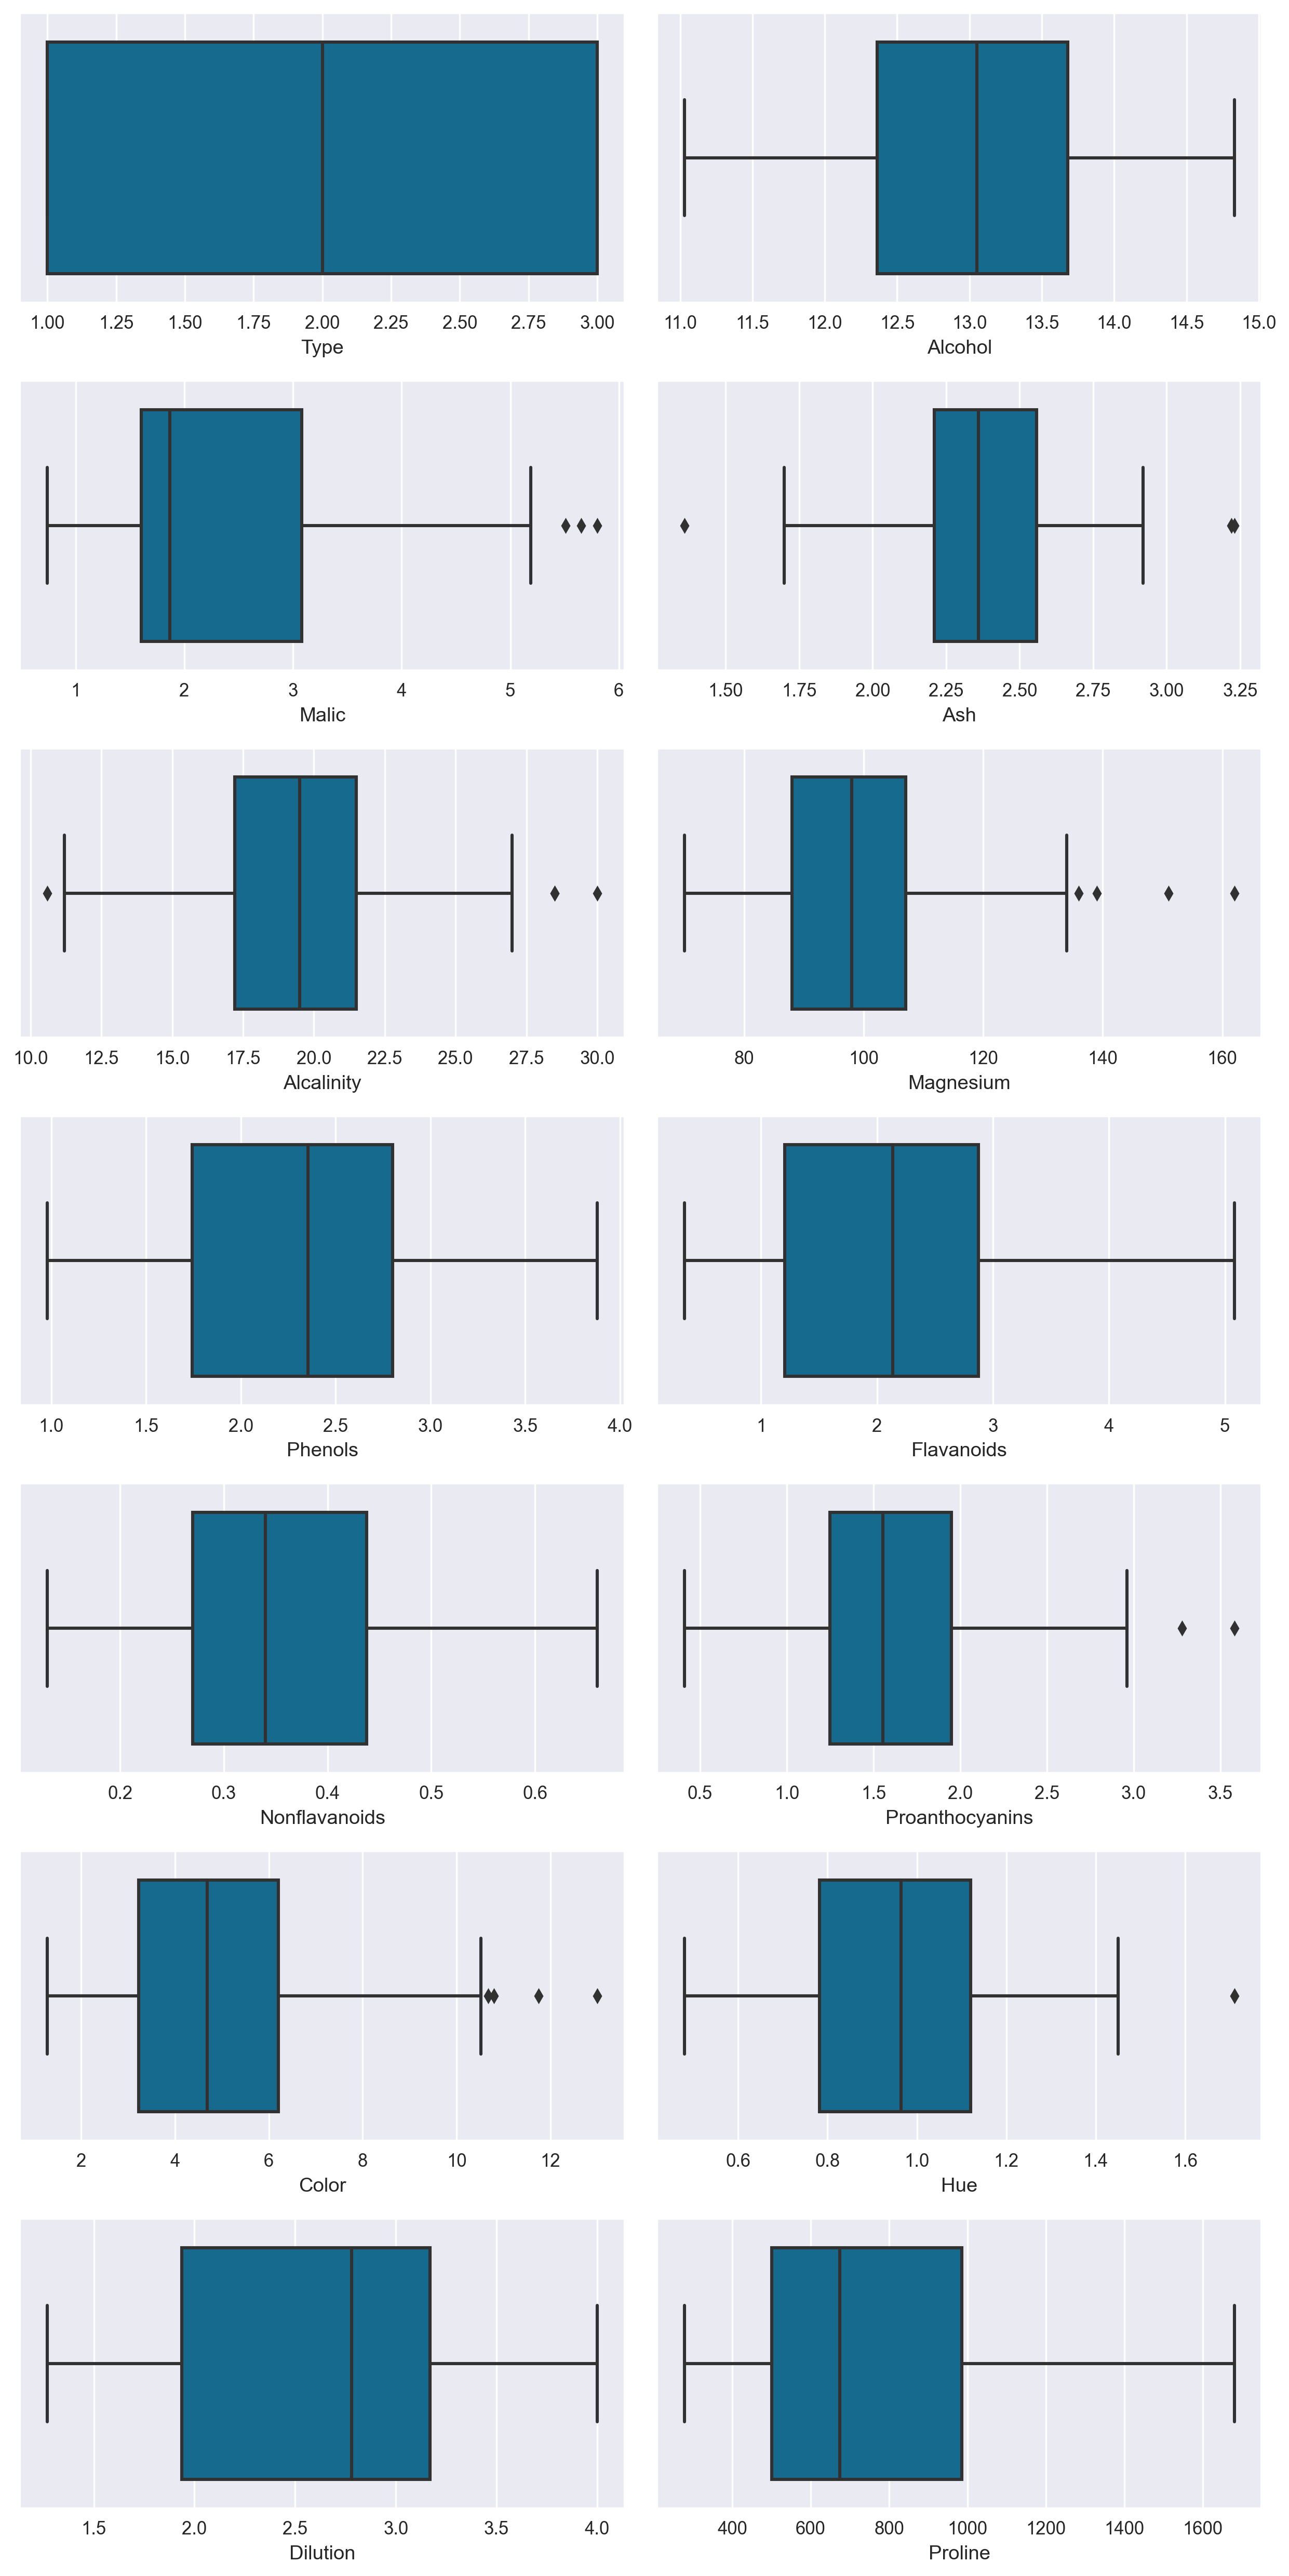

In [ ]:
fig, ax = plt.subplots(7, 2, figsize=(10, 20))

sns.boxplot(sd_train['Type'], ax = ax[0,0])
sns.boxplot(sd_train['Alcohol'], ax = ax[0,1])
sns.boxplot(sd_train['Malic'], ax = ax[1,0])
sns.boxplot(sd_train['Ash'], ax = ax[1,1])
sns.boxplot(sd_train['Alcalinity'], ax = ax[2,0])
sns.boxplot(sd_train['Magnesium'], ax = ax[2,1])
sns.boxplot(sd_train['Phenols'], ax = ax[3,0])
sns.boxplot(sd_train['Flavanoids'], ax = ax[3,1])
sns.boxplot(sd_train['Nonflavanoids'], ax = ax[4,0])
sns.boxplot(sd_train['Proanthocyanins'], ax = ax[4,1])
sns.boxplot(sd_train['Color'], ax = ax[5,0])
sns.boxplot(sd_train['Hue'], ax = ax[5,1])
sns.boxplot(sd_train['Dilution'], ax = ax[6,0])
sns.boxplot(sd_train['Proline'], ax = ax[6,1])

plt.tight_layout()

#### Ploting Histplot

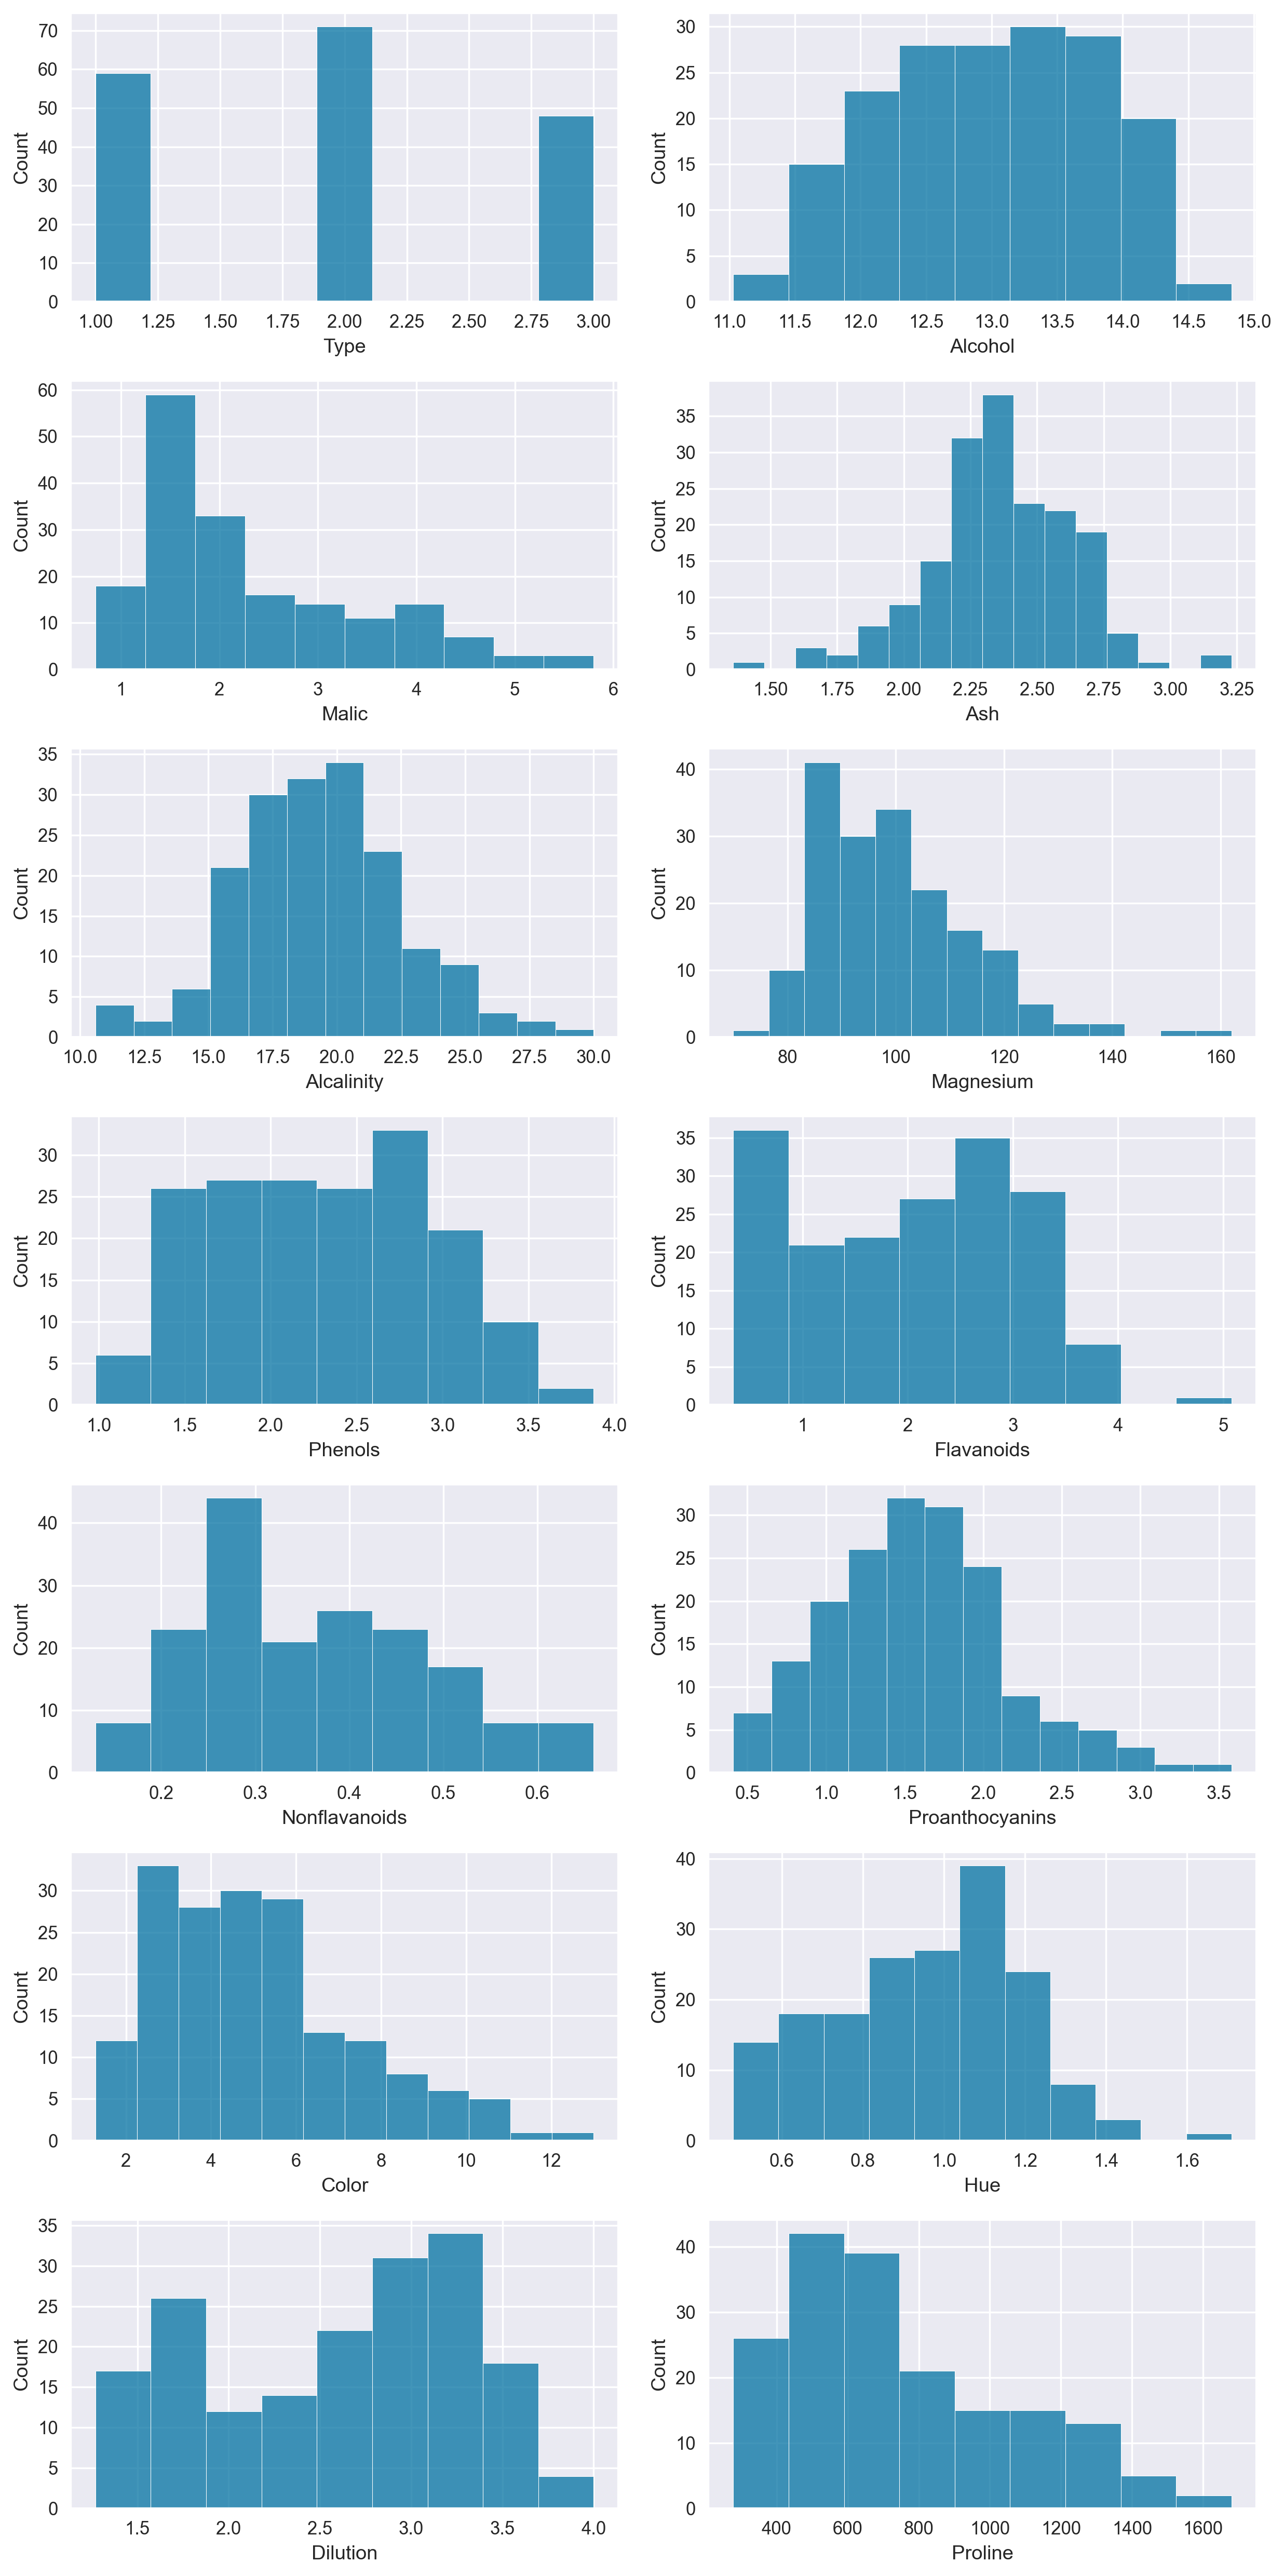

In [ ]:
fig, ax = plt.subplots(7, 2, figsize=(10, 20))

sns.histplot(sd_train['Type'], ax = ax[0,0])
sns.histplot(sd_train['Alcohol'], ax = ax[0,1])
sns.histplot(sd_train['Malic'], ax = ax[1,0])
sns.histplot(sd_train['Ash'], ax = ax[1,1])
sns.histplot(sd_train['Alcalinity'], ax = ax[2,0])
sns.histplot(sd_train['Magnesium'], ax = ax[2,1])
sns.histplot(sd_train['Phenols'], ax = ax[3,0])
sns.histplot(sd_train['Flavanoids'], ax = ax[3,1])
sns.histplot(sd_train['Nonflavanoids'], ax = ax[4,0])
sns.histplot(sd_train['Proanthocyanins'], ax = ax[4,1])
sns.histplot(sd_train['Color'], ax = ax[5,0])
sns.histplot(sd_train['Hue'], ax = ax[5,1])
sns.histplot(sd_train['Dilution'], ax = ax[6,0])
sns.histplot(sd_train['Proline'], ax = ax[6,1])

plt.tight_layout()

#### Ploting QQ - Plot

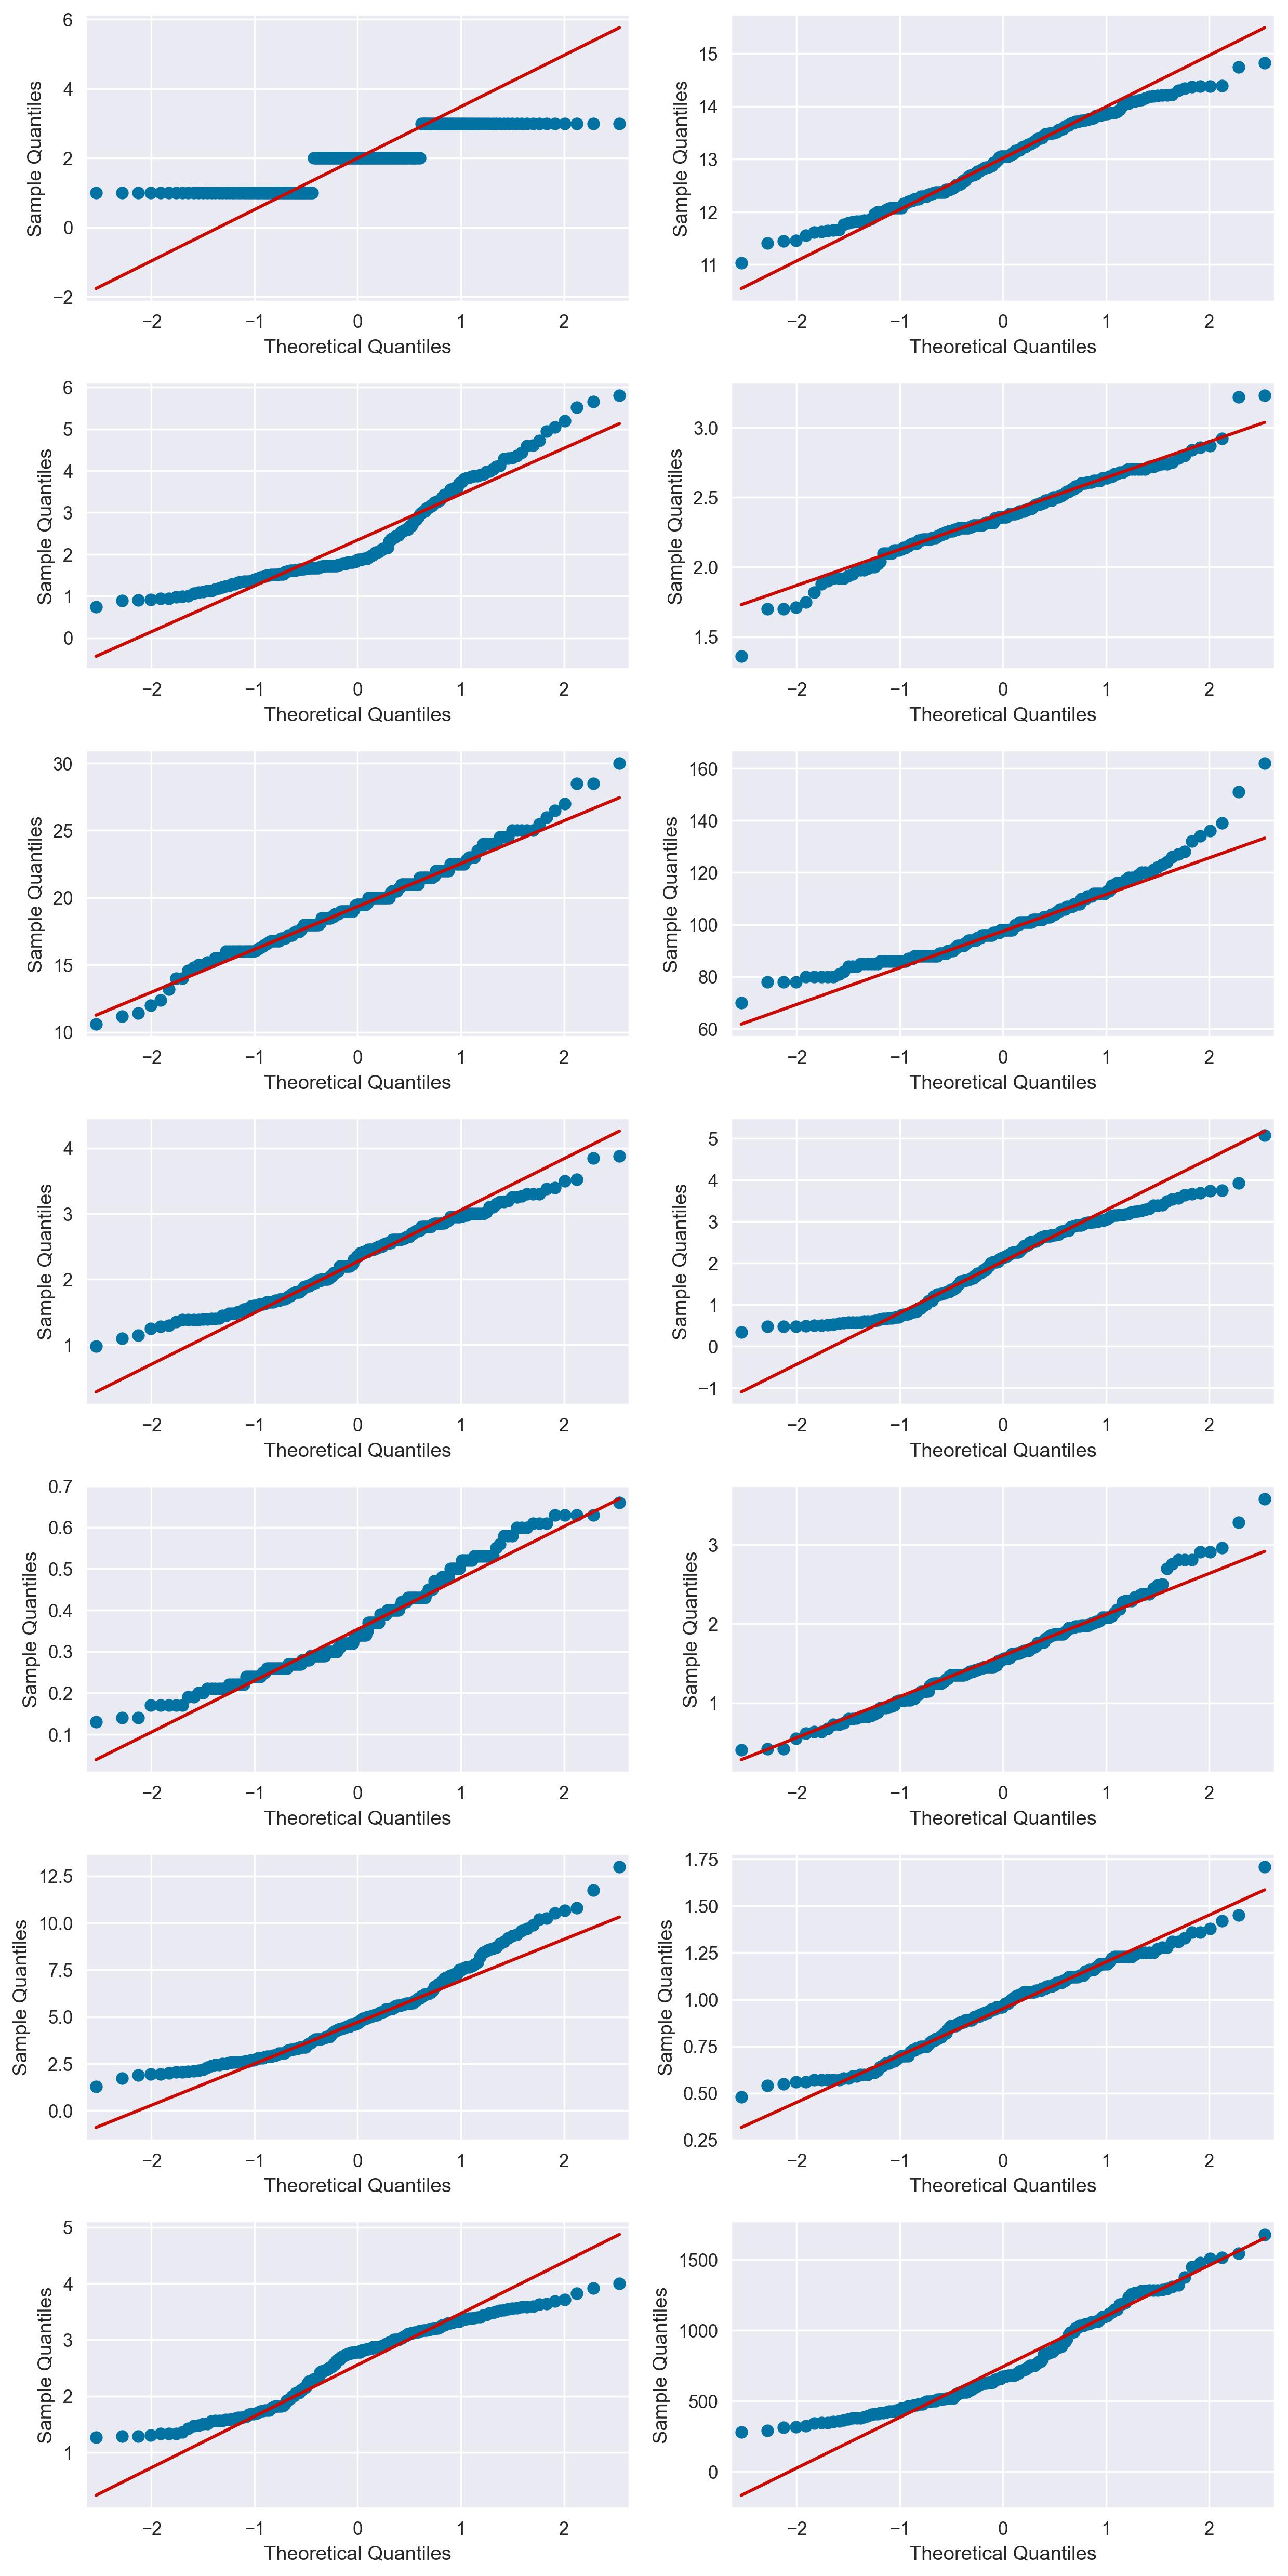

In [ ]:
fig, ax = plt.subplots(7, 2, figsize=(10, 20))

sm.qqplot(sd_train['Type'], ax = ax[0,0], line = 'q')
sm.qqplot(sd_train['Alcohol'], ax = ax[0,1], line = 'q')
sm.qqplot(sd_train['Malic'], ax = ax[1,0], line = 'q')
sm.qqplot(sd_train['Ash'], ax = ax[1,1], line = 'q')
sm.qqplot(sd_train['Alcalinity'], ax = ax[2,0], line = 'q')
sm.qqplot(sd_train['Magnesium'], ax = ax[2,1], line = 'q')
sm.qqplot(sd_train['Phenols'], ax = ax[3,0], line = 'q')
sm.qqplot(sd_train['Flavanoids'], ax = ax[3,1], line = 'q')
sm.qqplot(sd_train['Nonflavanoids'], ax = ax[4,0], line = 'q')
sm.qqplot(sd_train['Proanthocyanins'], ax = ax[4,1], line = 'q')
sm.qqplot(sd_train['Color'], ax = ax[5,0], line = 'q')
sm.qqplot(sd_train['Hue'], ax = ax[5,1], line = 'q')
sm.qqplot(sd_train['Dilution'], ax = ax[6,0], line = 'q')
sm.qqplot(sd_train['Proline'], ax = ax[6,1], line = 'q')

plt.tight_layout()

## Performing EDA In Test Dataset

### Applying Descriptive Statistics

In [ ]:
sd_test.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
sd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
sd_test.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [ ]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
                str(len(df[df.columns[i]].unique())))


In [22]:
uni(sd_test)


 All Unique Value in age
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 87 88 89
 90]
Total no of unique values 73

 All Unique Value in workclass
[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
Total no of unique values 7

 All Unique Value in education
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
Total no of unique values 16

 All Unique Value in educationno
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Total no of unique values 16

 All Unique Value in maritalstatus
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
Total no of unique values 7

 All 

### Checking for Duplicated Values

In [ ]:
sd_test[sd_test.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


- There is no duplicate vale in are dataset

### Visualizing The Data

#### Ploting Boxplot

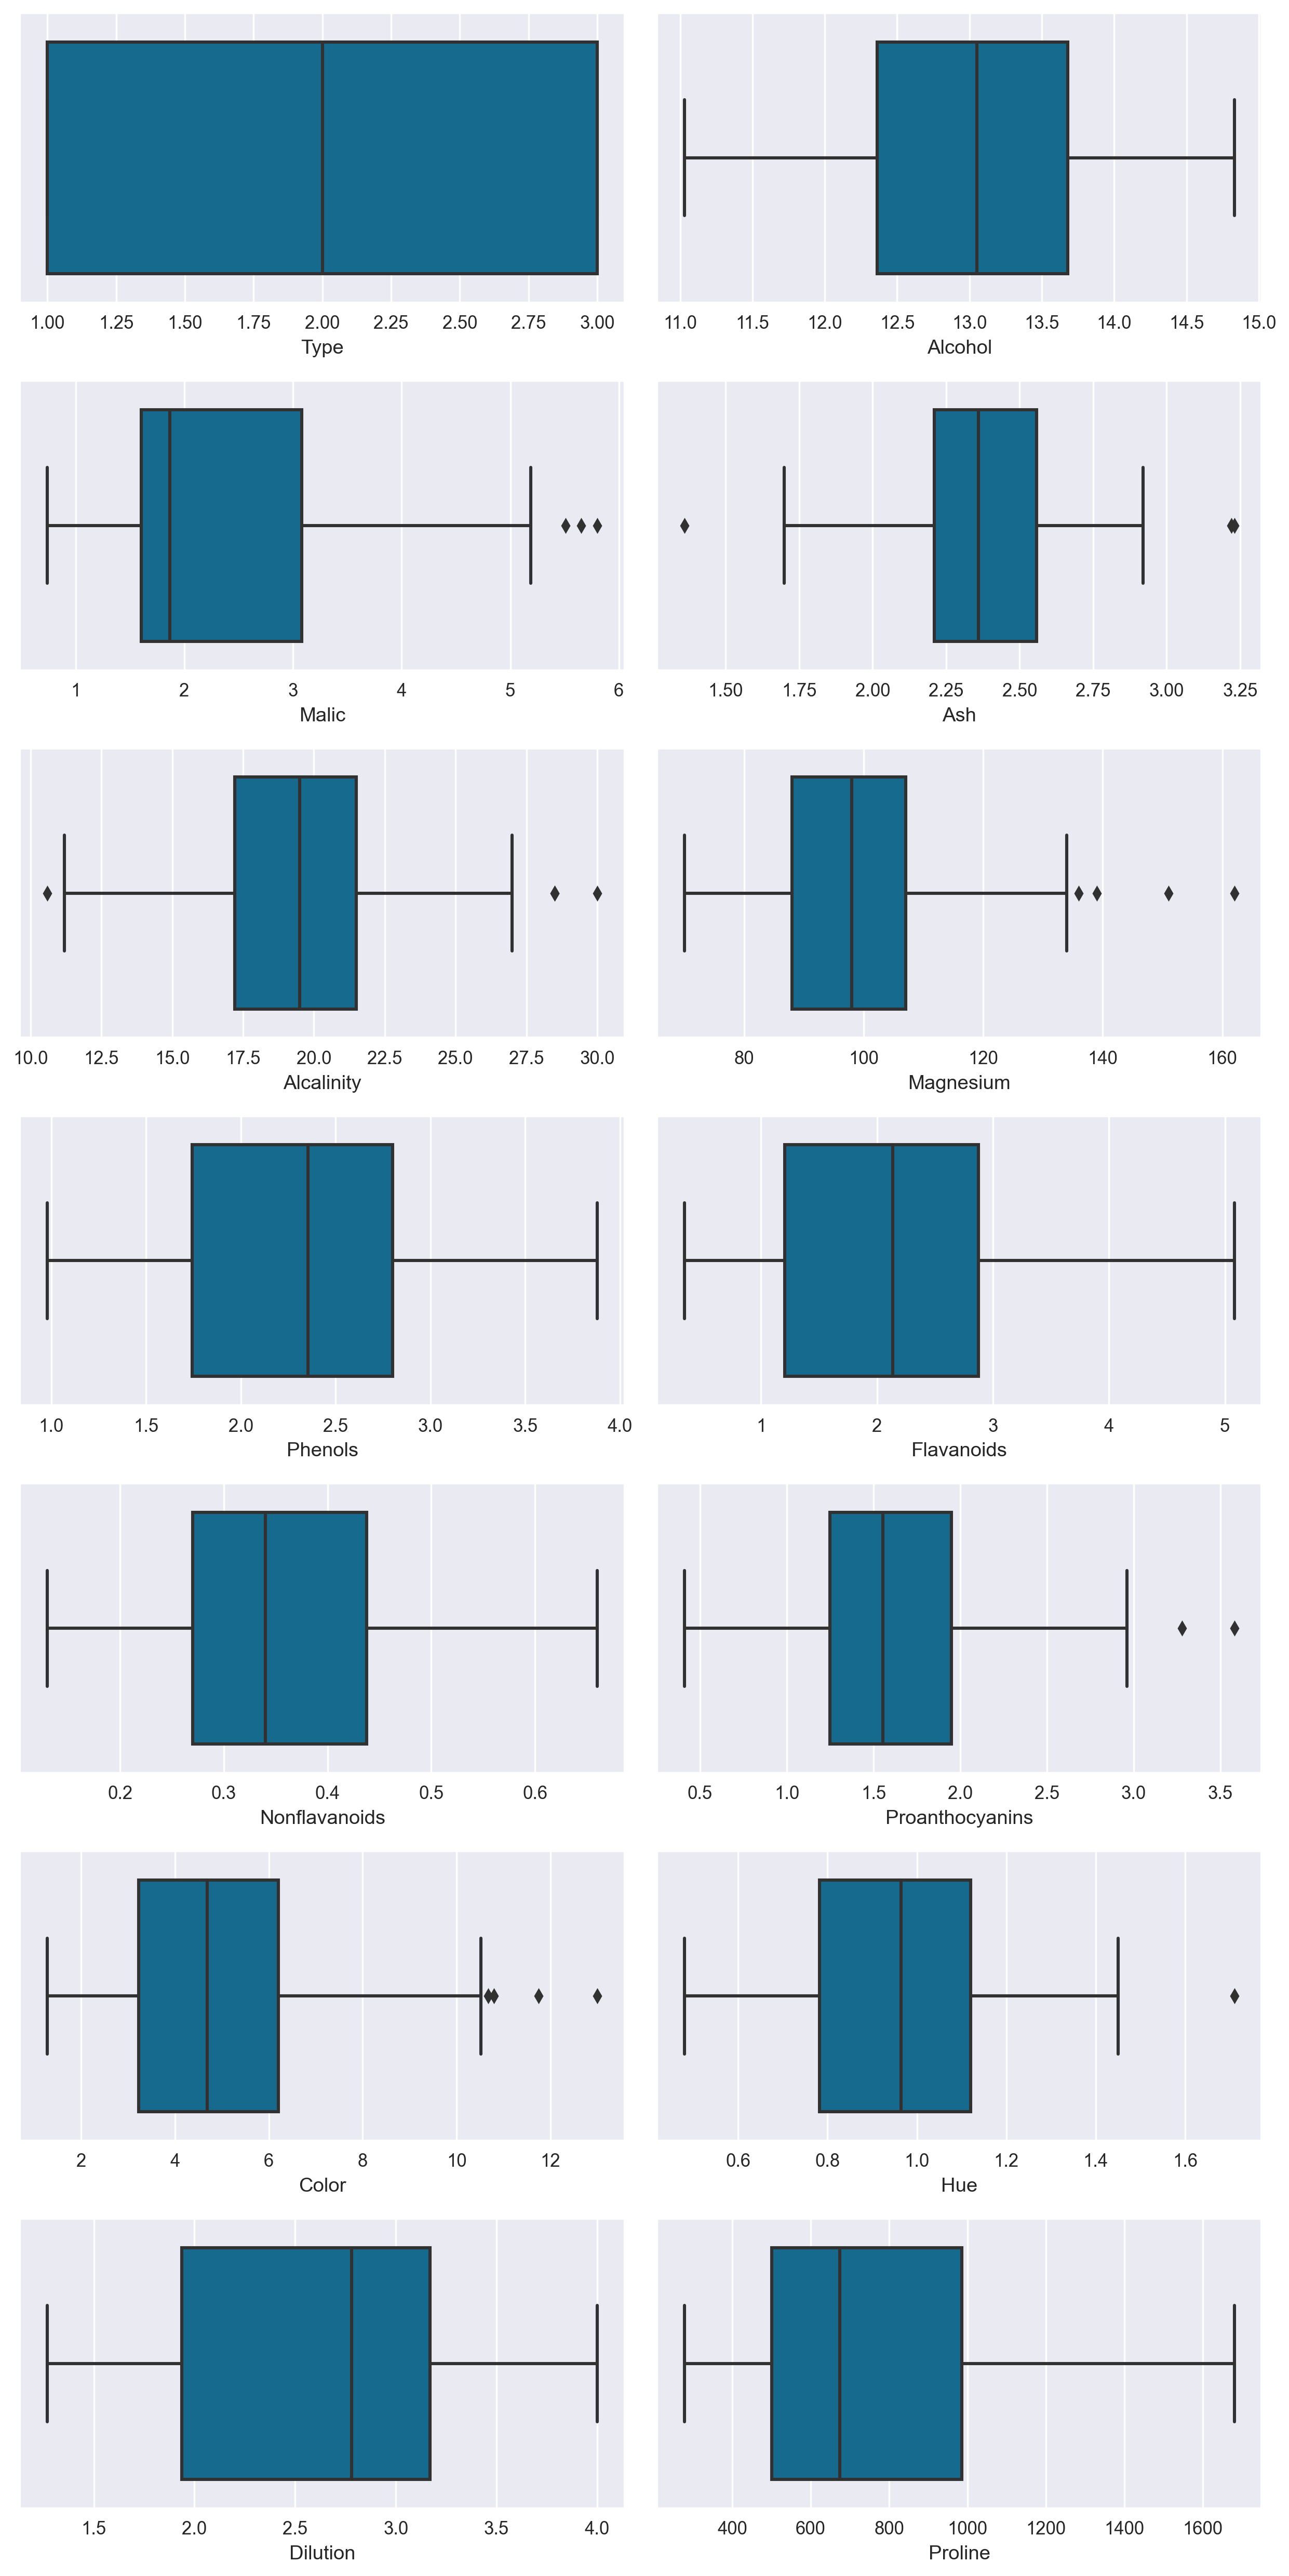

In [ ]:
fig, ax = plt.subplots(7, 2, figsize=(10, 20))

sns.boxplot(sd_test['Type'], ax = ax[0,0])
sns.boxplot(sd_test['Alcohol'], ax = ax[0,1])
sns.boxplot(sd_test['Malic'], ax = ax[1,0])
sns.boxplot(sd_test['Ash'], ax = ax[1,1])
sns.boxplot(sd_test['Alcalinity'], ax = ax[2,0])
sns.boxplot(sd_test['Magnesium'], ax = ax[2,1])
sns.boxplot(sd_test['Phenols'], ax = ax[3,0])
sns.boxplot(sd_test['Flavanoids'], ax = ax[3,1])
sns.boxplot(sd_test['Nonflavanoids'], ax = ax[4,0])
sns.boxplot(sd_test['Proanthocyanins'], ax = ax[4,1])
sns.boxplot(sd_test['Color'], ax = ax[5,0])
sns.boxplot(sd_test['Hue'], ax = ax[5,1])
sns.boxplot(sd_test['Dilution'], ax = ax[6,0])
sns.boxplot(sd_test['Proline'], ax = ax[6,1])

plt.tight_layout()

#### Ploting Histplot

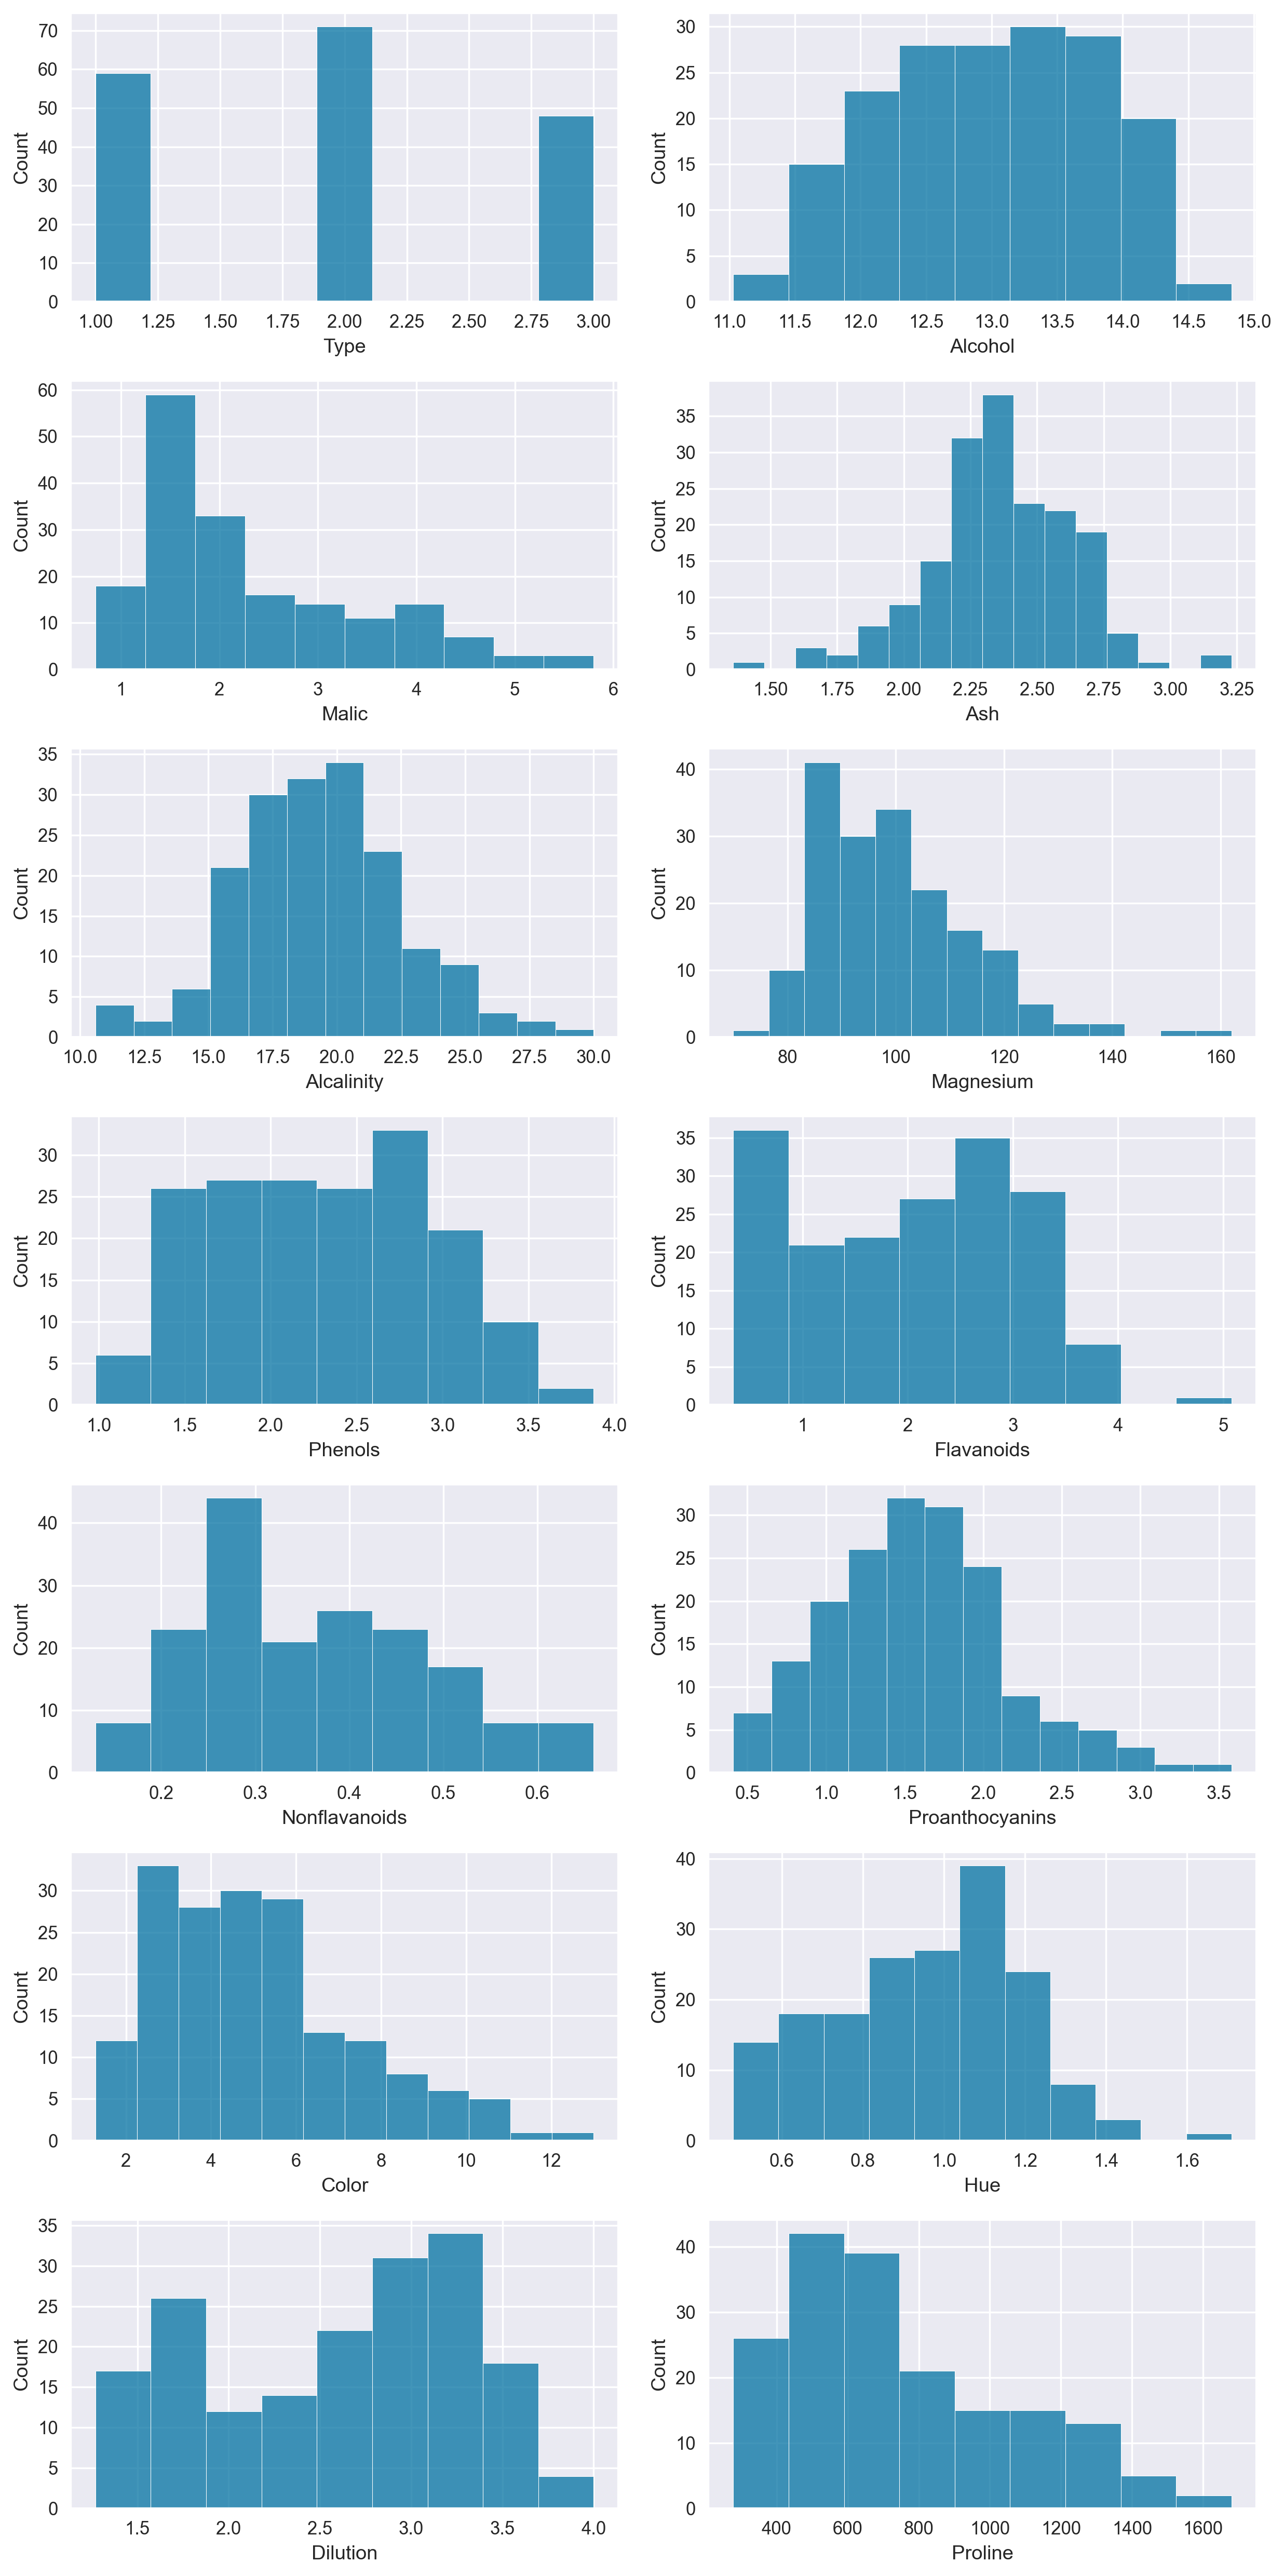

In [ ]:
fig, ax = plt.subplots(7, 2, figsize=(10, 20))

sns.histplot(sd_test['Type'], ax = ax[0,0])
sns.histplot(sd_test['Alcohol'], ax = ax[0,1])
sns.histplot(sd_test['Malic'], ax = ax[1,0])
sns.histplot(sd_test['Ash'], ax = ax[1,1])
sns.histplot(sd_test['Alcalinity'], ax = ax[2,0])
sns.histplot(sd_test['Magnesium'], ax = ax[2,1])
sns.histplot(sd_test['Phenols'], ax = ax[3,0])
sns.histplot(sd_test['Flavanoids'], ax = ax[3,1])
sns.histplot(sd_test['Nonflavanoids'], ax = ax[4,0])
sns.histplot(sd_test['Proanthocyanins'], ax = ax[4,1])
sns.histplot(sd_test['Color'], ax = ax[5,0])
sns.histplot(sd_test['Hue'], ax = ax[5,1])
sns.histplot(sd_test['Dilution'], ax = ax[6,0])
sns.histplot(sd_test['Proline'], ax = ax[6,1])

plt.tight_layout()

#### Ploting QQ - Plot

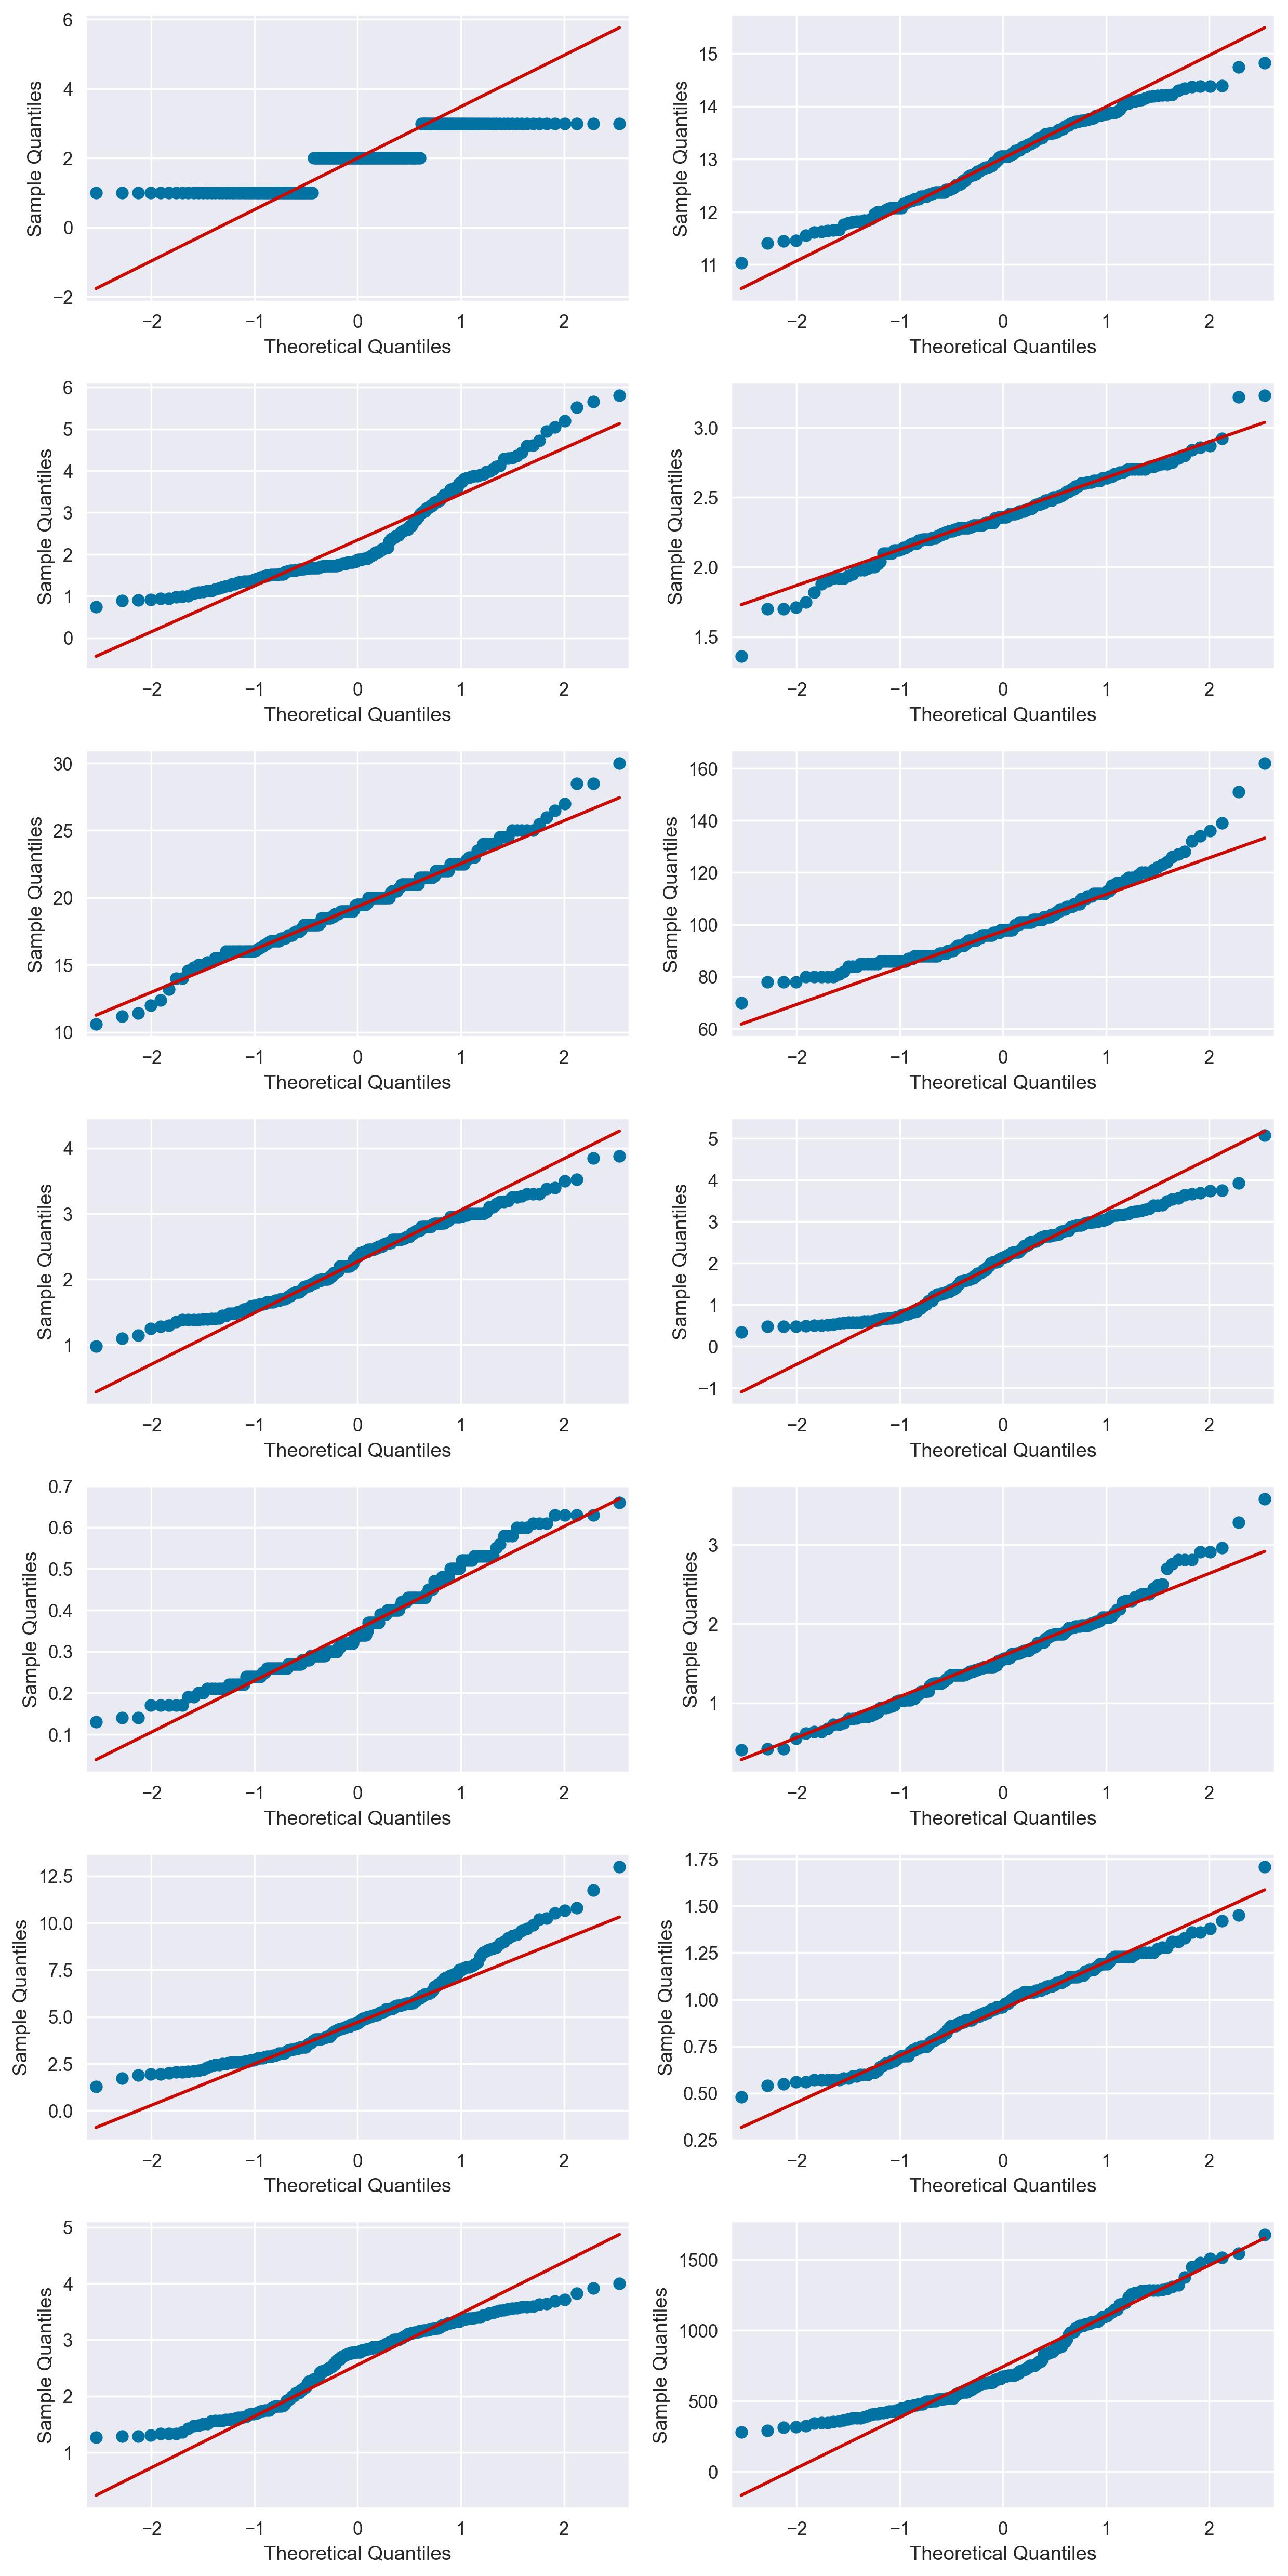

In [ ]:
fig, ax = plt.subplots(7, 2, figsize=(10, 20))

sm.qqplot(sd_test['Type'], ax = ax[0,0], line = 'q')
sm.qqplot(sd_test['Alcohol'], ax = ax[0,1], line = 'q')
sm.qqplot(sd_test['Malic'], ax = ax[1,0], line = 'q')
sm.qqplot(sd_test['Ash'], ax = ax[1,1], line = 'q')
sm.qqplot(sd_test['Alcalinity'], ax = ax[2,0], line = 'q')
sm.qqplot(sd_test['Magnesium'], ax = ax[2,1], line = 'q')
sm.qqplot(sd_test['Phenols'], ax = ax[3,0], line = 'q')
sm.qqplot(sd_test['Flavanoids'], ax = ax[3,1], line = 'q')
sm.qqplot(sd_test['Nonflavanoids'], ax = ax[4,0], line = 'q')
sm.qqplot(sd_test['Proanthocyanins'], ax = ax[4,1], line = 'q')
sm.qqplot(sd_test['Color'], ax = ax[5,0], line = 'q')
sm.qqplot(sd_test['Hue'], ax = ax[5,1], line = 'q')
sm.qqplot(sd_test['Dilution'], ax = ax[6,0], line = 'q')
sm.qqplot(sd_test['Proline'], ax = ax[6,1], line = 'q')

plt.tight_layout()